In [1]:
bayesplay::loadpackages()

# Priors II

Up until now I haven't mentioned much a choosing priors for regression models. The kinds of decisions that go into choosing priors for regressions models differs slightly in it's emphasis compared with choosing priors for Bayes factors. 

## Priors that help model fits

One of the primary motivations for picking particular priors for an estimation problems is that you want priors that will help the MCMC chains converge. When using MCMC to estimate the parameters you want the chains to converge on the posterior distributions. Priors that are wildly different to the expected posterior can prevent this from happening. 

**brms** (and most Bayesian estimation software) provides you with information that can help you to determine whether your model was able to converge properly. The first bit of information to look at the is the Effective Sample Size (ESS). **brms** provides output for both the ESS near the centre of the posterior (Bulk_ESS) and in the tails (Tail_ESS). When samples are highly autocorrelated then the ESS will be low, and this suggests that the model was not able to converge. One solution to this, is just to run the MCMC for longer. But if you're, for example, running it for 4,000 samples and your ESS is 5, then the amount amount of extra time you might need to run it for becomes completely impractical. 

Apart from looking at the ESS, another option is simply to look at the MCMC chains themselves. Good chains should look like thick hairy caterpillars. If they don't, then you might have a problem. 

Besides all that, **brms** with using print out a warning tell you that something has gone wrong. 

When this happens, you have a couple of choice available to you. The first of these is to choose a prior that will help the model converge. To see this in action, we'll perform a little simulation. 

Our simulated data will just consistent of two data points (-1 and 1) and we'll build a model that just tries to estimate the intercept. For our model we have very wide uniform priors that  range from -1e10 to 1e10 for $\alpha$ (the intercept) and from 0 to 1e10 for $\sigma$. We'll fit the model, look at the summary, and inspect the chains. 



In [2]:
# 1
# you can use priors to help your models converge
bad_priors = c(prior(uniform(-1e10, 1e10), class = Intercept), 
              prior(uniform(0,1e10), class = sigma))

bad_fit = brm(data = list(y = c(-1,1)),
              formula = y ~ 1, 
             family = "gaussian", 
             prior = bad_priors,
             seed = 5)



Compiling the C++ model

Start sampling




SAMPLING FOR MODEL '612e1c48c36f096eabd9f8531f309a13' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 6e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.06 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.318207 seconds (Warm-up)
Chain 1:                0.0314 seconds (Sampling)
Chai

Warning message:
“There were 833 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”
Warning message:
“There were 127 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
http://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded”
Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“The largest R-hat is 1.69, indicating chains have not mixed.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#r-hat”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/w

Warning message:
“The model has not converged (some Rhats are > 1.1). Do not analyse the results! 
We recommend running more iterations and/or setting stronger priors.”
Warning message:
“There were 833 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ 1 
   Data: list(y = c(-1, 1)) (Number of observations: 2) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
              Estimate    Est.Error      l-95% CI      u-95% CI Rhat Bulk_ESS
Intercept 151872789.93 938336601.05 -815783783.02 3008910178.96 1.69       35
          Tail_ESS
Intercept       16

Family Specific Parameters: 
          Estimate     Est.Error l-95% CI      u-95% CI Rhat Bulk_ESS Tail_ESS
sigma 543632255.59 1493533091.59    86.51 5726801767.76 1.67        7       10

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

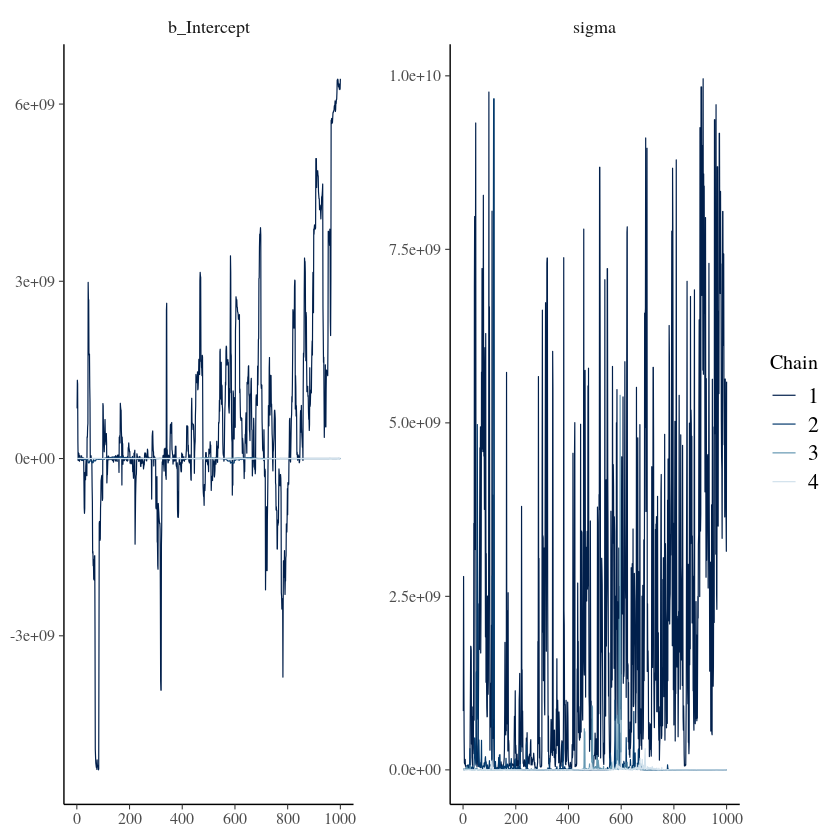

In [3]:
# 2
summary(bad_fit)
bayesplot::mcmc_trace(bad_fit,pars = c("b_Intercept","sigma"))

We can see from the summary that **brms** produced a warning, the ESS values are very low, and the estimated parameters and insane and have extremely high variability. If we examine the chanis they also look nothing like fat hairy caterpillars.

One was to rectify this situation is to choose better priors. Our original priors were very wide. Did we really believe our parameters could lie in that range?

We can tighten up our priors a bit and replace our intercept prior with a normal distribution centred at 0 with an sd of 10. This is still very wide considering our data, but less so that the original. For our sigma prior we can replace it with a half-Cauchy centred at 0 and with a scale of 1. This is a continuous distribution, so it extends the entire range, but it places a lot for weight on lower, and more reasonable, values. 
We'll re-fit the model with these new priors.

In [4]:
# 3
better_priors = c(prior(normal(0, 10), class = Intercept), 
              prior(normal(0,1), class = sigma))

better_fit = brm(data = list(y = c(-1,1)),
              formula = y ~ 1, 
             family = "gaussian", 
             prior = better_priors, 
             seed = 5)

Compiling the C++ model

Start sampling




SAMPLING FOR MODEL '630296bf0bdea1b86773c50da85e2d35' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 8e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.014243 seconds (Warm-up)
Chain 1:                0.014865 seconds (Sampling)
Ch

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: y ~ 1 
   Data: list(y = c(-1, 1)) (Number of observations: 2) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Population-Level Effects: 
          Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
Intercept     0.01      0.93    -1.86     1.96 1.00     1197     1150

Family Specific Parameters: 
      Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sigma     1.27      0.48     0.56     2.41 1.00     1398     1382

Samples were drawn using sampling(NUTS). For each parameter, Eff.Sample 
is a crude measure of effective sample size, and Rhat is the potential 
scale reduction factor on split chains (at convergence, Rhat = 1).

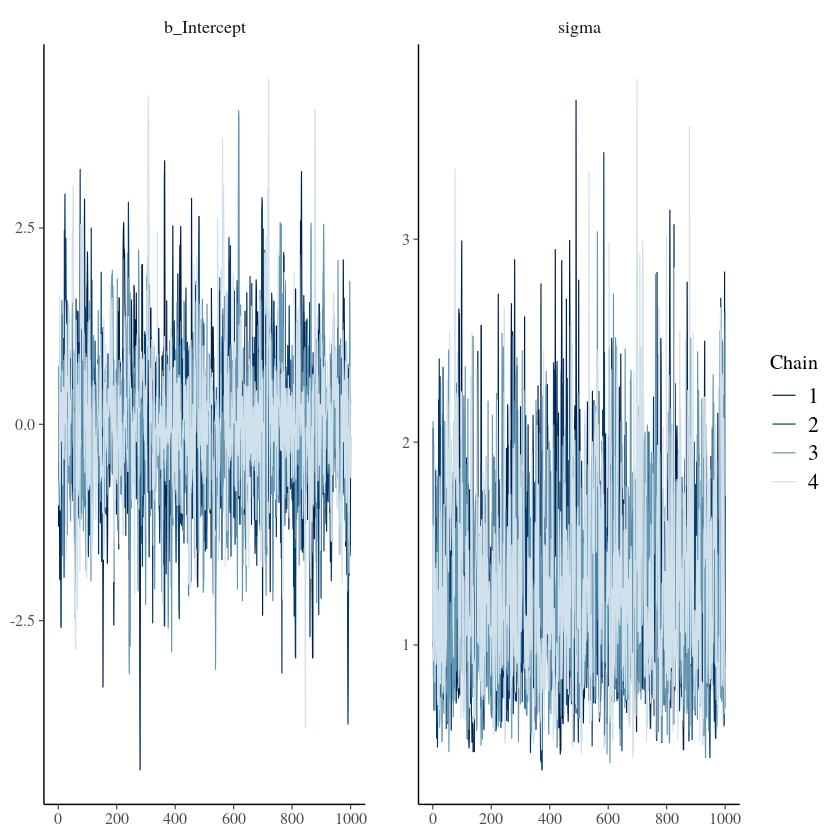

In [5]:
# 4
summary(better_fit)
bayesplot::mcmc_trace(better_fit,pars = c("b_Intercept","sigma"))

**brms** still produces a warning, but we can see that our ESS, our estimates, and our chains now look a lot better. 

We can also take a look at the priors and the posteriors together. 

In [6]:
# 5

posterior_summary(better_fit) %>% as.data.frame() %>% rownames_to_column("parameter") %>%
filter(parameter %in% c("b_Intercept","sigma")) %>% select(1,2,4,5) %>% 
set_colnames(c("parameter","estimate","lower 2.5%","upper 97.5%")) %>% knitr::kable("html") %>%
kableExtra::kable_styling() %>% 
as.character() %>% IRdisplay::display_html()

parameter,estimate,lower 2.5%,upper 97.5%
b_Intercept,0.0134041,-1.8572940,1.960386
sigma,1.2672206,0.5642223,2.410239


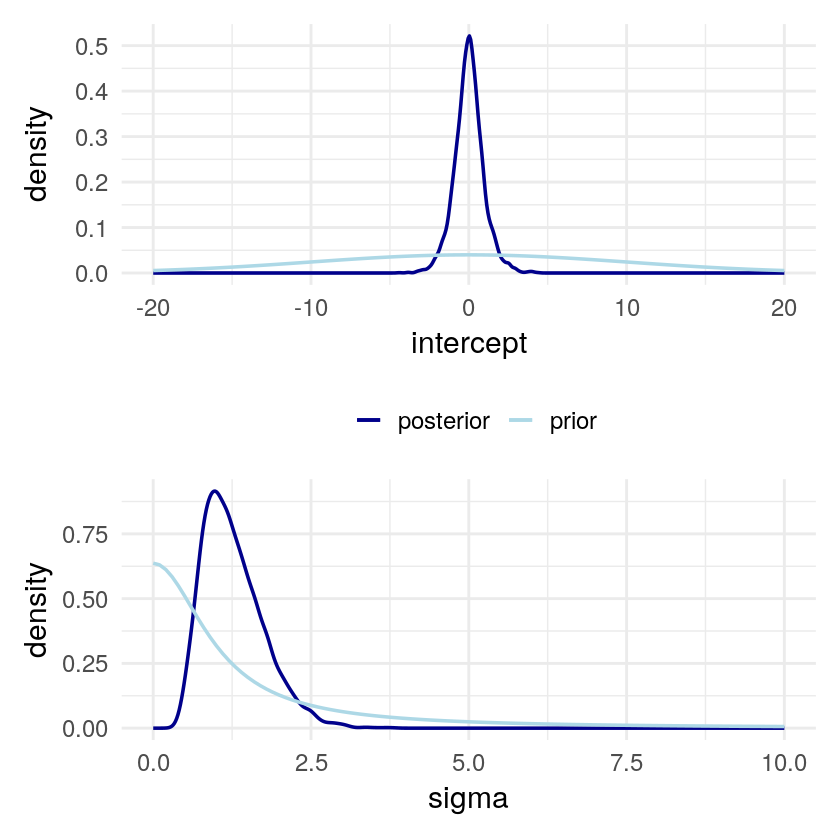

In [7]:
# 6 

intercept_plot = posterior_samples(better_fit) %>% ggplot() + 
stat_density(aes(x = b_Intercept), geom = "line", colour = "darkblue", size = 1, na.rm = T) +
geom_line(tibble(x = seq(-20,20,.1), 
                 y = dnorm(x = x, 0, 10)), 
          mapping = aes(x = x, y = y), colour = "lightblue", size = 1) + 
theme_minimal(18) + labs(x = "intercept")


sigma_plot = posterior_samples(better_fit) %>% ggplot() + 
stat_density(aes(x = sigma, colour = "darkblue"), geom = "line", size = 1, na.rm = T) +
geom_line(tibble(x = seq(0,10,.1), 
                 y = dcauchy(x = x,location = 0, scale = 1) * 2), 
          mapping = aes(x = x, y = y, colour = "lightblue"), size = 1) + 
theme_minimal(18) + scale_x_continuous(name = "sigma", limits = c(0,10)) +
scale_colour_manual(values = c("darkblue","lightblue"), name = NULL, labels = c("posterior","prior")) + 
theme(legend.position = "top")

intercept_plot / sigma_plot

 There is of course another choice available to us if our models don't converge. And that's to just add more data. We can do that in a simulation very easily. But it real life it's a lot harder. When we have a lot of data it's easier to get away with bad priors. But that doesn't mean we should. 

## General advice on priors

The emphasis here has been on helping the chains converge. However, the underlying motivation is not that different to the choices one makes when constructing priors for Bayes factors. Priors for Bayes factors can be thought of as model predictions. When choosing priors for estimation problems it also pays to think about the underlying data generating process.  Priors should be chosen rule out completely unreasonable values—that is, they shouldn't be very flat and wide because this causes problems both for estimation and Bayes factors—but they shouldn't rule out reasonable values—that is, priors shouldn't be to highly constrained. Here, good prior choice is often aided by working with standardised data, and it often helps to think about priors in terms of over-fitting and under-fitting. Very strong informative priors will over-fit to the data. Very weak priors with under-fit to the data. Ideally priors should strong the balance between over-fitting and under-fitting.

If you'd really like to dive into more about choosing priors, then the team behind **stan** (the software that powers **brms**) have a [wiki that they regularly update](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations). 